IRIS Dataset - RBF Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

IRIS Dataset - Linear Kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Letter Recognition Dataset - RBF Kernel
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2

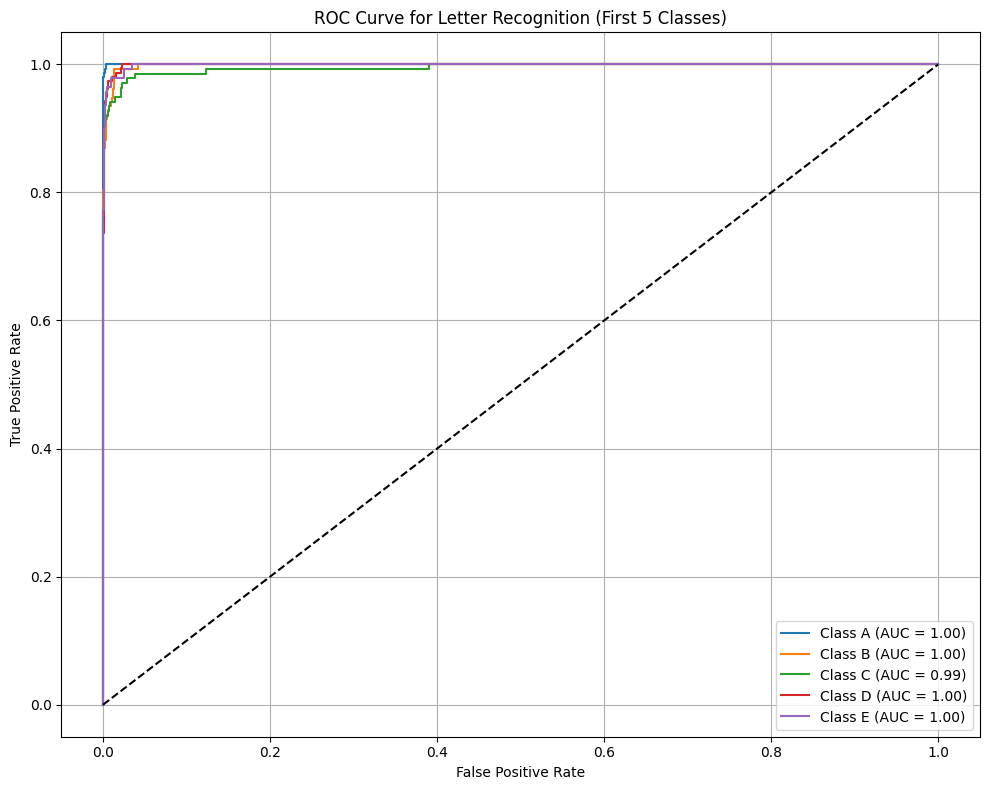

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

#  IRIS Dataset

iris_df = pd.read_csv("iris.csv")

X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)

print("IRIS Dataset - RBF Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = svm_linear.predict(X_test_iris)

print("\nIRIS Dataset - Linear Kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

#  Letter Recognition Dataset

letter_df = pd.read_csv("/content/letter-recognition.csv")


X_letter = letter_df.iloc[:, 1:]
y_letter = letter_df.iloc[:, 0]

X_train_let, X_test_let, y_train_let, y_test_let = train_test_split(X_letter, y_letter, test_size=0.2, random_state=42)

svm_letter = SVC(kernel='rbf', probability=True)
svm_letter.fit(X_train_let, y_train_let)
y_pred_letter = svm_letter.predict(X_test_let)

print("\nLetter Recognition Dataset - RBF Kernel")
print("Accuracy:", accuracy_score(y_test_let, y_pred_letter))
print("Confusion Matrix:\n", confusion_matrix(y_test_let, y_pred_letter))

lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_let)
y_score = svm_letter.predict_proba(X_test_let)

plt.figure(figsize=(10, 8))
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition (First 5 Classes)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
